## Image Augmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from pathlib import Path
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir = Path("./flowers/")

In [3]:
data_dir

WindowsPath('flowers')

In [4]:
data_list = list(data_dir.glob('*/*.jpg'))

In [5]:
data_list

[WindowsPath('flowers/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('flowers/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('flowers/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('flowers/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('flowers/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('flowers/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('flowers/daisy/10300722094_28fa978807_n.jpg'),
 WindowsPath('flowers/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('flowers/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('flowers/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('flowers/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('flowers/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('flowers/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('flowers/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('flowers/daisy/10555749515_13a12a026e.jpg'),
 WindowsPath('flowers/daisy/10555815624_dc211569b0.jpg'),
 WindowsPath('flowers/daisy/10555826524_423eb8bf71_n.jpg'),
 Wi

In [6]:
total_images = len(data_list)

In [7]:
total_images

4317

In [8]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('rose/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflower/*')),
    'tulips' : list(data_dir.glob('tulip/*'))
}

In [9]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

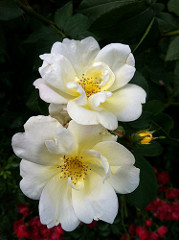

In [10]:
PIL.Image.open(flowers_images_dict['roses'][0]) #img opener -> PIL.Image.open('file path')

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) #img -> 3 dimensional numpy array
img

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [12]:
img.shape

(240, 179, 3)

In [13]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [14]:
x ,y = [], []

for flowers_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flowers_labels_dict[flowers_name])

In [15]:
x[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [16]:
x = np.array(x)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [18]:
len(x_train)

3237

In [19]:
len(x_test)

1080

In [20]:
x_trained_scaled = x_train / 255
x_text_scaled = x_test / 255

In [21]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [22]:
model.fit(x_trained_scaled, y_train, epochs = 30)

Epoch 1/30
102/102 [==============================] - 25s 242ms/step - loss: 1.5504 - accuracy: 0.3293
Epoch 2/30
102/102 [==============================] - 25s 248ms/step - loss: 1.1386 - accuracy: 0.5382
Epoch 3/30
102/102 [==============================] - 24s 235ms/step - loss: 0.9543 - accuracy: 0.6274
Epoch 4/30
102/102 [==============================] - 24s 235ms/step - loss: 0.7654 - accuracy: 0.7176
Epoch 5/30
102/102 [==============================] - 24s 235ms/step - loss: 0.5534 - accuracy: 0.8085
Epoch 6/30
102/102 [==============================] - 24s 235ms/step - loss: 0.3754 - accuracy: 0.8613
Epoch 7/30
102/102 [==============================] - 24s 238ms/step - loss: 0.2298 - accuracy: 0.9225
Epoch 8/30
102/102 [==============================] - 24s 237ms/step - loss: 0.1336 - accuracy: 0.9592
Epoch 9/30
102/102 [==============================] - 24s 238ms/step - loss: 0.0889 - accuracy: 0.9747
Epoch 10/30
102/102 [==============================] - 24s 238ms/step - l

In [23]:
model.evaluate(x_text_scaled, y_test)

34/34 [==============================] - 2s 61ms/step - loss: 2.5112 - accuracy: 0.6417


[2.5112075805664062, 0.6416666507720947]

In [24]:
prediction = model.predict(x_text_scaled)
prediction

34/34 [==============================] - 2s 61ms/step


array([[  9.295413  ,  -5.7631044 ,  -7.0247097 , -15.569595  ,
          8.905126  ],
       [ -9.106066  ,   7.200748  ,   7.089268  ,  -7.839681  ,
         -9.987403  ],
       [  2.7872078 ,  -4.2749286 ,   4.429289  ,  -6.7302494 ,
          0.25472704],
       ...,
       [-15.201604  ,   8.193791  ,   9.05653   ,  -7.8657866 ,
         -6.7294784 ],
       [ -9.79331   ,  -4.801291  ,   5.4352174 ,   0.6429254 ,
         -5.9153967 ],
       [ -4.827103  ,   2.8829377 ,  11.548001  , -19.08866   ,
         -7.6433525 ]], dtype=float32)

In [25]:
score = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([5.9635174e-01, 1.7205666e-07, 4.8726328e-08, 9.4790790e-12,
       4.0364802e-01], dtype=float32)>

In [26]:
np.argmax(score)

0

In [27]:
y_test[1]

1

In [28]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                input_shape = (180,
                                                              180,
                                                              3))
    
])

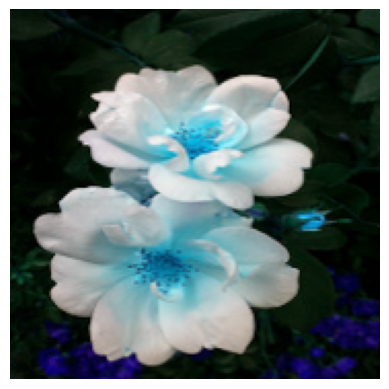

In [29]:
plt.axis('off')
plt.imshow(x[0])

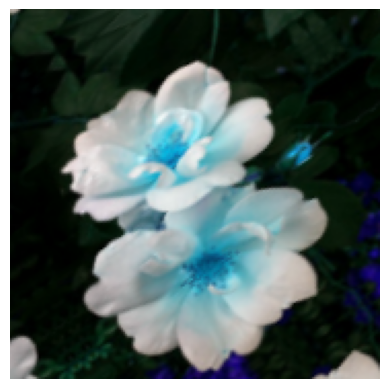

In [30]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [31]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [32]:
model.fit(x_trained_scaled, y_train, epochs = 30)

Epoch 1/30
102/102 [==============================] - 39s 328ms/step - loss: 1.3135 - accuracy: 0.4276
Epoch 2/30
102/102 [==============================] - 31s 303ms/step - loss: 1.0498 - accuracy: 0.5897
Epoch 3/30
102/102 [==============================] - 31s 302ms/step - loss: 0.9490 - accuracy: 0.6318
Epoch 4/30
102/102 [==============================] - 31s 302ms/step - loss: 0.8896 - accuracy: 0.6531
Epoch 5/30
102/102 [==============================] - 31s 305ms/step - loss: 0.8101 - accuracy: 0.6877
Epoch 6/30
102/102 [==============================] - 31s 305ms/step - loss: 0.7612 - accuracy: 0.7105
Epoch 7/30
102/102 [==============================] - 31s 305ms/step - loss: 0.7448 - accuracy: 0.7167
Epoch 8/30
102/102 [==============================] - 31s 306ms/step - loss: 0.6772 - accuracy: 0.7442
Epoch 9/30
102/102 [==============================] - 31s 306ms/step - loss: 0.6431 - accuracy: 0.7637
Epoch 10/30
102/102 [==============================] - 31s 306ms/step - l

In [33]:
model.evaluate(x_text_scaled,y_test)

34/34 [==============================] - 2s 64ms/step - loss: 1.3405 - accuracy: 0.6787


[1.3405455350875854, 0.6787037253379822]